In [28]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

### training information

In [29]:
labels = ["buildings", "forest", "mountain", "sea"]
training_images = np.zeros(shape=(10669, 32,32,3))
training_labels = np.zeros(shape=(10669,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'training',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'training/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        training_images[idx,:] = np.array(im)
        training_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

In [30]:
training_images.shape

(10669, 32, 32, 3)

In [31]:
training_images[0].shape

(32, 32, 3)

### validation information

In [32]:
labels = ["buildings", "forest","mountain", "sea"]
valid_images = np.zeros(shape=(1226, 32,32,3))
valid_labels = np.zeros(shape=(1226,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'validation',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'validation/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        valid_images[idx,:] = np.array(im)
        valid_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

### testing information

In [33]:
labels = ["buildings", "forest","mountain", "sea"]
testing_images = np.zeros(shape=(960, 32,32,3))
testing_labels = np.zeros(shape=(960,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'testing',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'testing/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        testing_images[idx,:] = np.array(im)
        testing_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu'))
model.add(layers. Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [35]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
hist = model.fit(training_images, training_labels, epochs=20, validation_data=(valid_images, valid_labels))

Epoch 1/20
334/334 [==============================] - 10s 29ms/step - loss: 1.5149 - accuracy: 0.6298 - val_loss: 0.6674 - val_accuracy: 0.7406
Epoch 2/20
334/334 [==============================] - 12s 35ms/step - loss: 0.6046 - accuracy: 0.7606 - val_loss: 0.5893 - val_accuracy: 0.7879
Epoch 3/20
334/334 [==============================] - 9s 27ms/step - loss: 0.5126 - accuracy: 0.7996 - val_loss: 0.5042 - val_accuracy: 0.8034
Epoch 4/20
334/334 [==============================] - 10s 29ms/step - loss: 0.4359 - accuracy: 0.8368 - val_loss: 0.4330 - val_accuracy: 0.8263
Epoch 5/20
334/334 [==============================] - 10s 31ms/step - loss: 0.3901 - accuracy: 0.8509 - val_loss: 0.3495 - val_accuracy: 0.8703
Epoch 6/20
334/334 [==============================] - 9s 28ms/step - loss: 0.3291 - accuracy: 0.8806 - val_loss: 0.5851 - val_accuracy: 0.7977
Epoch 7/20
334/334 [==============================] - 8s 23ms/step - loss: 0.2954 - accuracy: 0.8904 - val_loss: 0.3287 - val_accuracy: 0.

In [37]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print('Loss =', loss)
print(f'Accuracy = {accuracy*100} %')

30/30 [==============================] - 0s 11ms/step - loss: 0.2837 - accuracy: 0.9375
Loss = 0.28366145491600037
Accuracy = 93.75 %


In [38]:
model.save('result.model')

INFO:tensorflow:Assets written to: result.model\assets


### visualization

In [48]:
pred = model.predict(testing_images)
cm = confusion_matrix(testing_labels,pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names=['glacier', 'sea', 'forest', 'street', 'mountain', 'buildings'],
                     show_normed = True);

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

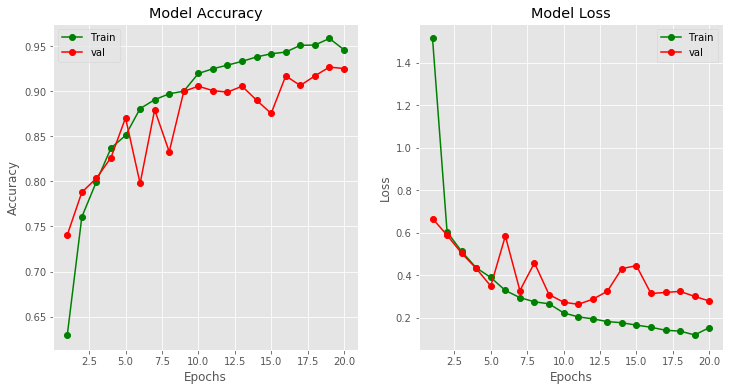

In [46]:
plt.figure(figsize=(12,6))
plt.style.use("ggplot")
epochs = range(1,21)
plt.subplot(1,2,1)
plt.plot(epochs,hist.history["accuracy"],"go-")
plt.plot(epochs,hist.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc="upper left")

plt.subplot(1,2,2)
plt.plot(epochs,hist.history["loss"],"go-")
plt.plot(epochs,hist.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc="upper right")
plt.show()